In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
from altair_saver import save
import pickle

altair_colors = ["#4c78a8", "#f58518", "#e45756", "#72b7b2", "#54a24b", 
               "#eeca3b", "#b279a2", "#ff9da6", "#9d755d", "#bab0ac"]


In [ ]:
## 1. Fig 1c ---
## 2. Fig 1d ---
## 3. Fig 1e ---

In [ ]:
## 1. Fig 1c ---

In [5]:
dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
df_final = pd.read_csv(dir+'diff_compounds_mod_rate.txt',sep='\t')
sort_order = ["Unmodified", "50mM_kethoxal", "100mM_1AI", "35mM_NAIN3", "50mM_NAIN3"]

chart = alt.Chart(df_final).mark_boxplot().encode(
    x=alt.X("batch", axis=alt.Axis(title=""), sort=sort_order),
    y=alt.Y("modrate", axis=alt.Axis(title="Mod Rate (%)")),
    color=alt.Color("batch", legend=alt.Legend(title="Category"), sort=sort_order) #Probing Chemistry and Concentration
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    labelFontSize=14,
    titleFontSize=16
).configure_title(
    fontSize=16
).configure_header(
    labelFontSize=14,
    titleFontSize=16
).properties(
    width=300,
    height=300,
    title="Modification rate per transcript"
)
chart.encoding.y.title = 'Mod Rate (%)'
display(chart)

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/'
save(chart, dir_out+ "Fig1c_mod_rate_per_transcript.pdf")

/apps/users/hanjian/miniconda3/envs/gis/lib/python3.9/site-packages/altair/utils/core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

WARN Infinite extent for field "modrate": [Infinity, -Infinity]


In [ ]:
## 2. Fig 1d ---

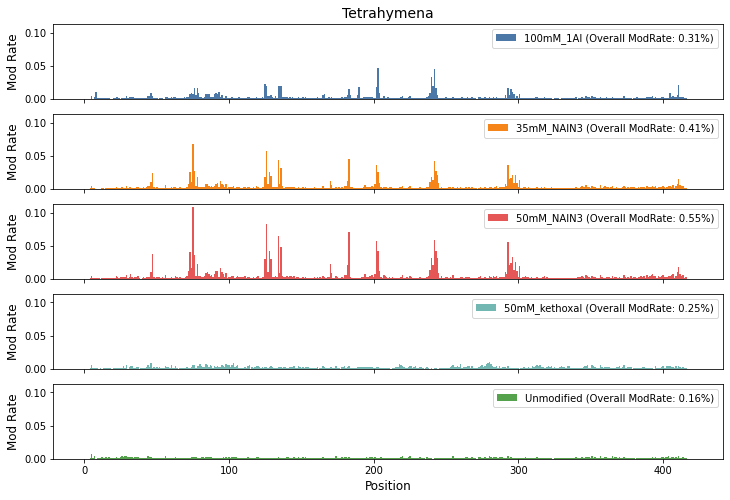

In [6]:
dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/"
with open(dir+'tetrahymena_mod_rate.pkl', 'rb') as f:
    dict_profiles = pickle.load(f)

fig, ax = plt.subplots(5, 1, figsize=(12, 8), sharex=True, sharey=True)

for no, (k, v) in enumerate(dict_profiles.items()):
    ax[no].bar(dict_profiles[k][6].index, dict_profiles[k][6], label= "%s (Overall ModRate: %.2f%%)" % (k, dict_profiles[k][5]), color=altair_colors[no], width=1.0)
    ax[no].legend()
    ax[no].set_ylabel("Mod Rate", fontsize=12)

ax[-1].set_xlabel("Position", fontsize=12)
ax[0].set_title("Tetrahymena", fontsize=14)

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/'
fig.savefig(dir_out+'Fig1d_tetrahymena_mod_rate_barplot.pdf',bbox_inches='tight')

In [ ]:
## 3. Fig 1e ---

In [4]:
f_mapping_rate = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/ribosxitch_mapping_rate.txt"
df_results = pd.read_csv(f_mapping_rate, sep="\t", names=["batch", "condition", "total_reads", "mapped_reads", "mapped_rate"])
df_results["mapped_rate"] *= 100
df_results = df_results[df_results['condition'] != 'MT']
sort_order = ["Unmodified", "50mM_kethoxal", "100mM_1AI", "35mM_NAIN3", "50mM_NAIN3"]

bars_mapped = alt.Chart(df_results).mark_bar().encode(
    x=alt.X("batch", axis=alt.Axis(title=None), sort=sort_order),
    y=alt.Y("mean(mapped_rate)", axis=alt.Axis(title="Mapped Rate (%) of Total Reads"), scale=alt.Scale(domain=[0, 100])),
    color=alt.Color("batch", legend=alt.Legend(title="[Chemistry]"), sort=sort_order) #Probing Chemistry and Concentration
)

text_mapped = alt.Chart(df_results).mark_text(dx=0, dy=-10, color='black', fontSize=14).encode(
    x=alt.X("batch", axis=alt.Axis(title="Category"), sort=sort_order),
    y=alt.Y("mean(mapped_rate)", axis=alt.Axis(title="Mapped Rate (%) of Total Reads")),
    text=alt.Text("mean(mapped_rate)", format=".1f")
)

chart = bars_mapped + text_mapped

chart2 = chart.configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    labelFontSize=14,
    titleFontSize=16
).configure_title(
    fontSize=16
).configure_header(
    labelFontSize=14,
    titleFontSize=16
).properties(
    width=300,
    height=300,
    title="Minimap 2 Alignment Rate (%)"
)

display(chart2)

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/'
save(chart2, dir_out+ "Fig1e_minimap2_alignment_rate.pdf")

/apps/users/hanjian/miniconda3/envs/gis/lib/python3.9/site-packages/altair/utils/core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)